# Shinkansen Travel Experience 

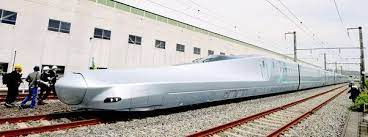

##### The goal of the problem is to predict whether a passenger was satisfied or not considering his/her overall experience of traveling on the Shinkansen Bullet Train.

In [43]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

# Command to tell Python to actually display the graphs
%matplotlib inline

# this library contains a large number of probability distributions as well as a growing library of statistical functions
import scipy.stats as stats  

# sklearn library for predicitive modelling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

# To build linear regression_model
import statsmodels.api as sm

# set working directory
import os
os.getcwd()
os.chdir('C:\\Users\\Dubey\\Downloads')

import warnings
warnings.filterwarnings("ignore")

In [2]:
# this two lines of code is just to increase the size of the display
from IPython.core.display import display, HTML 
display(HTML('<style>.container { width:90% !important; }<\style>'))

# set column number to see all columns
pd.set_option('display.max_columns', 22)

## READ DATA : given in problem set

In [3]:
data = pd.read_csv("Data_dictionary_(1).csv")
stest = pd.read_csv("Surveydata_test.csv")
strain = pd.read_csv("Surveydata_train_(1).csv")
ttest = pd.read_csv("Traveldata_test.csv")
ttrain = pd.read_csv("Traveldata_train_(1).csv")
sample_submittion  = pd.read_csv("Sample_Submission_(2).csv")

### data dictionaey

In [4]:
data.head(10)

,Unnamed: 0,Seat comfort,Unnamed: 2,Unnamed: 3,Arrival time convenient,Unnamed: 5,Unnamed: 6,Catering,Unnamed: 8,Unnamed: 9,Platform location
0,0.0,extremely poor,NaN,0.0,extremely poor,NaN,0.0,extremely poor,NaN,0,very inconvienient
1,1.0,poor,NaN,1.0,poor,NaN,1.0,poor,NaN,1,Inconvienient
2,2.0,need improvement,NaN,2.0,need improvement,NaN,2.0,need improvement,NaN,2,need improvement
3,3.0,acceptable,NaN,3.0,acceptable,NaN,3.0,acceptable,NaN,3,manageable
4,4.0,good,NaN,4.0,good,NaN,4.0,good,NaN,4,Convienient
5,5.0,excellent,NaN,5.0,excellent,NaN,5.0,excellent,NaN,5,very convienient
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,onboard wifi service,NaN,NaN,onboard entertainment,NaN,NaN,Online support,NaN,NaN,Ease of Online booking
8,0.0,extremely poor,NaN,0.0,extremely poor,NaN,0.0,extremely poor,NaN,0,extremely poor
9,1.0,poor,NaN,1.0,poor,NaN,1.0,poor,NaN,1,poor


In [5]:
# clean data dictionary 

# Count the number of NaN values in each column
nan_count = data.isna().sum()

# Calculate the percentage of NaN values in each column
nan_percent = nan_count/len(data)*100

# Select the columns with less than 25% NaN values
data = data[nan_percent[nan_percent < 25].index]

# Drop duplicate rows
data = data.drop_duplicates()

data

,Seat comfort,Unnamed: 3,Arrival time convenient,Unnamed: 6,Catering,Platform location
0,extremely poor,0.0,extremely poor,0.0,extremely poor,very inconvienient
1,poor,1.0,poor,1.0,poor,Inconvienient
2,need improvement,2.0,need improvement,2.0,need improvement,need improvement
3,acceptable,3.0,acceptable,3.0,acceptable,manageable
4,good,4.0,good,4.0,good,Convienient
5,excellent,5.0,excellent,5.0,excellent,very convienient
6,NaN,NaN,NaN,NaN,NaN,NaN
7,onboard wifi service,NaN,onboard entertainment,NaN,Online support,Ease of Online booking
8,extremely poor,0.0,extremely poor,0.0,extremely poor,extremely poor
9,poor,1.0,poor,1.0,poor,poor


## ---------------------------------------------------------------------------understanding data--------------------------------------------------------------------------

### survey train data 

In [6]:
# Check the head of dataset
strain.head()

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good


In [7]:
# Check the tail of dataset
strain.tail()

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
94374,98894375,0,poor,Ordinary,good,good,Convinient,poor,poor,poor,poor,good,good,good,need improvement,good,poor
94375,98894376,1,good,Ordinary,good,good,Convinient,need improvement,excellent,excellent,acceptable,acceptable,acceptable,acceptable,good,acceptable,good
94376,98894377,1,need improvement,Green Car,need improvement,need improvement,need improvement,good,excellent,good,good,good,good,good,acceptable,good,acceptable
94377,98894378,0,need improvement,Ordinary,NaN,need improvement,Convinient,good,need improvement,good,good,acceptable,good,good,good,excellent,good
94378,98894379,0,acceptable,Ordinary,poor,acceptable,manageable,acceptable,acceptable,acceptable,acceptable,poor,good,good,poor,good,acceptable


In [8]:
# Get information about the train dataset
print(strain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_time_convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_location        94349 non-null  object
 7   Onboardwifi_service      94349 non-null  object
 8   Onboard_entertainment    94361 non-null  object
 9   Online_support           94288 non-null  object
 10  Onlinebooking_Ease       94306 non-null  object
 11  Onboard_service          86778 non-null  object
 12  Leg_room                 94289 non-null  object
 13  Baggage_handling         94237 non-null  object
 14  Checkin_service          94302 non-nul

In [9]:
# Get basic statistics of numerical variables in the train dataset
strain.describe()

,ID,Overall_Experience
count,9.437900e+04,94379.000000
mean,9.884719e+07,0.546658
std,2.724501e+04,0.497821
min,9.880000e+07,0.000000
25%,9.882360e+07,0.000000
50%,9.884719e+07,1.000000
75%,9.887078e+07,1.000000
max,9.889438e+07,1.000000


In [10]:
# Check for null values and show the percentage of nulls
null_values = strain.isnull().sum().rename('null_count')
null_percent = ((null_values / strain.shape[0]) * 100).rename('null_percentage')
null_info = pd.concat([null_values,null_percent],axis=1)
print(null_info)

                         null_count  null_percentage
ID                                0         0.000000
Overall_Experience                0         0.000000
Seat_comfort                     61         0.064633
Seat_Class                        0         0.000000
Arrival_time_convenient        8930         9.461851
Catering                       8741         9.261594
Platform_location                30         0.031787
Onboardwifi_service              30         0.031787
Onboard_entertainment            18         0.019072
Online_support                   91         0.096420
Onlinebooking_Ease               73         0.077348
Onboard_service                7601         8.053698
Leg_room                         90         0.095360
Baggage_handling                142         0.150457
Checkin_service                  77         0.081586
Cleanliness                       6         0.006357
Online_boarding                   6         0.006357


In [11]:
# Check for any unwanted characters in numerical columns in the train dataset
for col in strain.select_dtypes(include='number').columns:
    print(col, strain[col][~np.isreal(strain[col])].unique())

ID []
Overall_Experience []


In [12]:
# Check for duplicate rows
duplicate_rows = strain[strain.duplicated()]
duplicate_rows

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding


In [13]:
# Check for zeros and show the percentage of zeros
zero_values = strain.eq(0).sum().rename('zero_count')
zero_percent = (zero_values / strain.shape[0]) * 100
zero_percent = zero_percent.rename('zero_percentage')
zero_info = pd.concat([zero_values,zero_percent],axis=1)
print(zero_info)

                         zero_count  zero_percentage
ID                                0         0.000000
Overall_Experience            42786        45.334237
Seat_comfort                      0         0.000000
Seat_Class                        0         0.000000
Arrival_time_convenient           0         0.000000
Catering                          0         0.000000
Platform_location                 0         0.000000
Onboardwifi_service               0         0.000000
Onboard_entertainment             0         0.000000
Online_support                    0         0.000000
Onlinebooking_Ease                0         0.000000
Onboard_service                   0         0.000000
Leg_room                          0         0.000000
Baggage_handling                  0         0.000000
Checkin_service                   0         0.000000
Cleanliness                       0         0.000000
Online_boarding                   0         0.000000


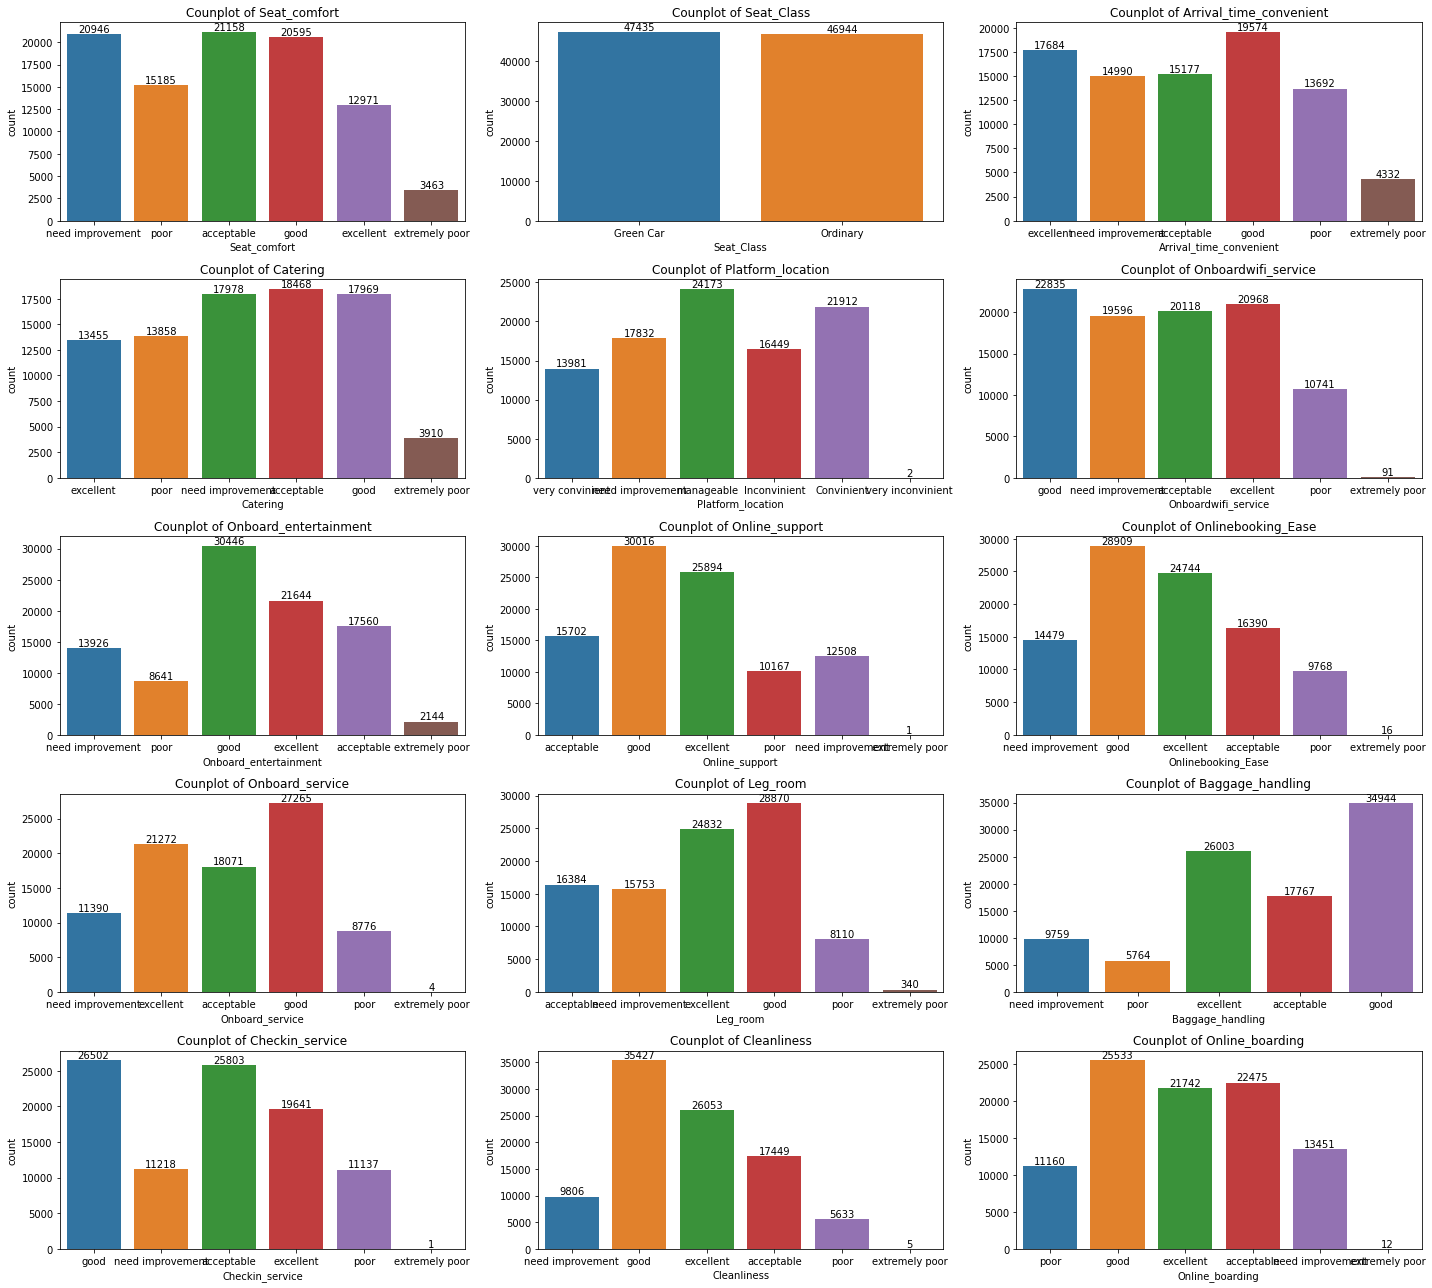

In [14]:
datacat=strain.select_dtypes(include='object')

plt.figure(figsize = (20,18))
feature_list = datacat.columns
for i in range(len(feature_list)):
    plt.subplot(5, 3, i + 1)
    ax1=sns.countplot(x = datacat[feature_list[i]], data = datacat)
    ax1.bar_label(ax1.containers[0])
    plt.title('Counplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### survey test data 

In [15]:
# Check the head of dataset
stest.head()

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,99900001,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor
1,99900002,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable
2,99900003,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent
3,99900004,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor
4,99900005,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,NaN,acceptable,excellent,excellent,excellent,excellent


In [16]:
# Check the tail of dataset
stest.tail()

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
35597,99935598,need improvement,Green Car,excellent,need improvement,manageable,acceptable,need improvement,acceptable,acceptable,good,excellent,good,acceptable,good,acceptable
35598,99935599,need improvement,Ordinary,need improvement,good,need improvement,acceptable,excellent,excellent,good,good,good,good,acceptable,good,good
35599,99935600,good,Green Car,extremely poor,good,need improvement,need improvement,good,poor,need improvement,poor,acceptable,poor,poor,excellent,need improvement
35600,99935601,excellent,Ordinary,excellent,excellent,Inconvinient,acceptable,excellent,good,excellent,excellent,excellent,excellent,acceptable,excellent,good
35601,99935602,good,Ordinary,acceptable,good,manageable,poor,good,poor,poor,acceptable,good,good,need improvement,good,poor


In [17]:
# Get information about the train dataset
print(stest.info())

# Get basic statistics of numerical variables in the train dataset
stest.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       35602 non-null  int64 
 1   Seat_comfort             35580 non-null  object
 2   Seat_Class               35602 non-null  object
 3   Arrival_time_convenient  32277 non-null  object
 4   Catering                 32245 non-null  object
 5   Platform_location        35590 non-null  object
 6   Onboardwifi_service      35590 non-null  object
 7   Onboard_entertainment    35594 non-null  object
 8   Online_support           35576 non-null  object
 9   Onlinebooking_Ease       35584 non-null  object
 10  Onboard_service          32730 non-null  object
 11  Leg_room                 35577 non-null  object
 12  Baggage_handling         35562 non-null  object
 13  Checkin_service          35580 non-null  object
 14  Cleanliness              35600 non-nul

,ID
count,3.560200e+04
mean,9.991780e+07
std,1.027756e+04
min,9.990000e+07
25%,9.990890e+07
50%,9.991780e+07
75%,9.992670e+07
max,9.993560e+07


In [18]:
# Check for null values and show the percentage of nulls
print('null check')
null_values = stest.isnull().sum().rename('null_count')
null_percent = ((null_values / stest.shape[0]) * 100).rename('null_percentage')
null_info = pd.concat([null_values,null_percent],axis=1)
print(null_info)

# Check for any unwanted characters in numerical columns in the train dataset
print('\n unwanted character check \n ')
for col in stest.select_dtypes(include='number').columns:
    print(col, stest[col][~np.isreal(stest[col])].unique())

# Check for duplicate rows
print('\n duplicate data check \n')
duplicate_rows = stest[stest.duplicated()]
duplicate_rows

# Check for zeros and show the percentage of zeros
print('\n zeros check \n')
zero_values = stest.eq(0).sum().rename('zero_count')
zero_percent = (zero_values / stest.shape[0]) * 100
zero_percent = zero_percent.rename('zero_percentage')
zero_info = pd.concat([zero_values,zero_percent],axis=1)
print(zero_info)

null check
                         null_count  null_percentage
ID                                0         0.000000
Seat_comfort                     22         0.061794
Seat_Class                        0         0.000000
Arrival_time_convenient        3325         9.339363
Catering                       3357         9.429246
Platform_location                12         0.033706
Onboardwifi_service              12         0.033706
Onboard_entertainment             8         0.022471
Online_support                   26         0.073030
Onlinebooking_Ease               18         0.050559
Onboard_service                2872         8.066963
Leg_room                         25         0.070221
Baggage_handling                 40         0.112353
Checkin_service                  22         0.061794
Cleanliness                       2         0.005618
Online_boarding                   2         0.005618

 unwanted character check 
 
ID []

 duplicate data check 


 zeros check 

           

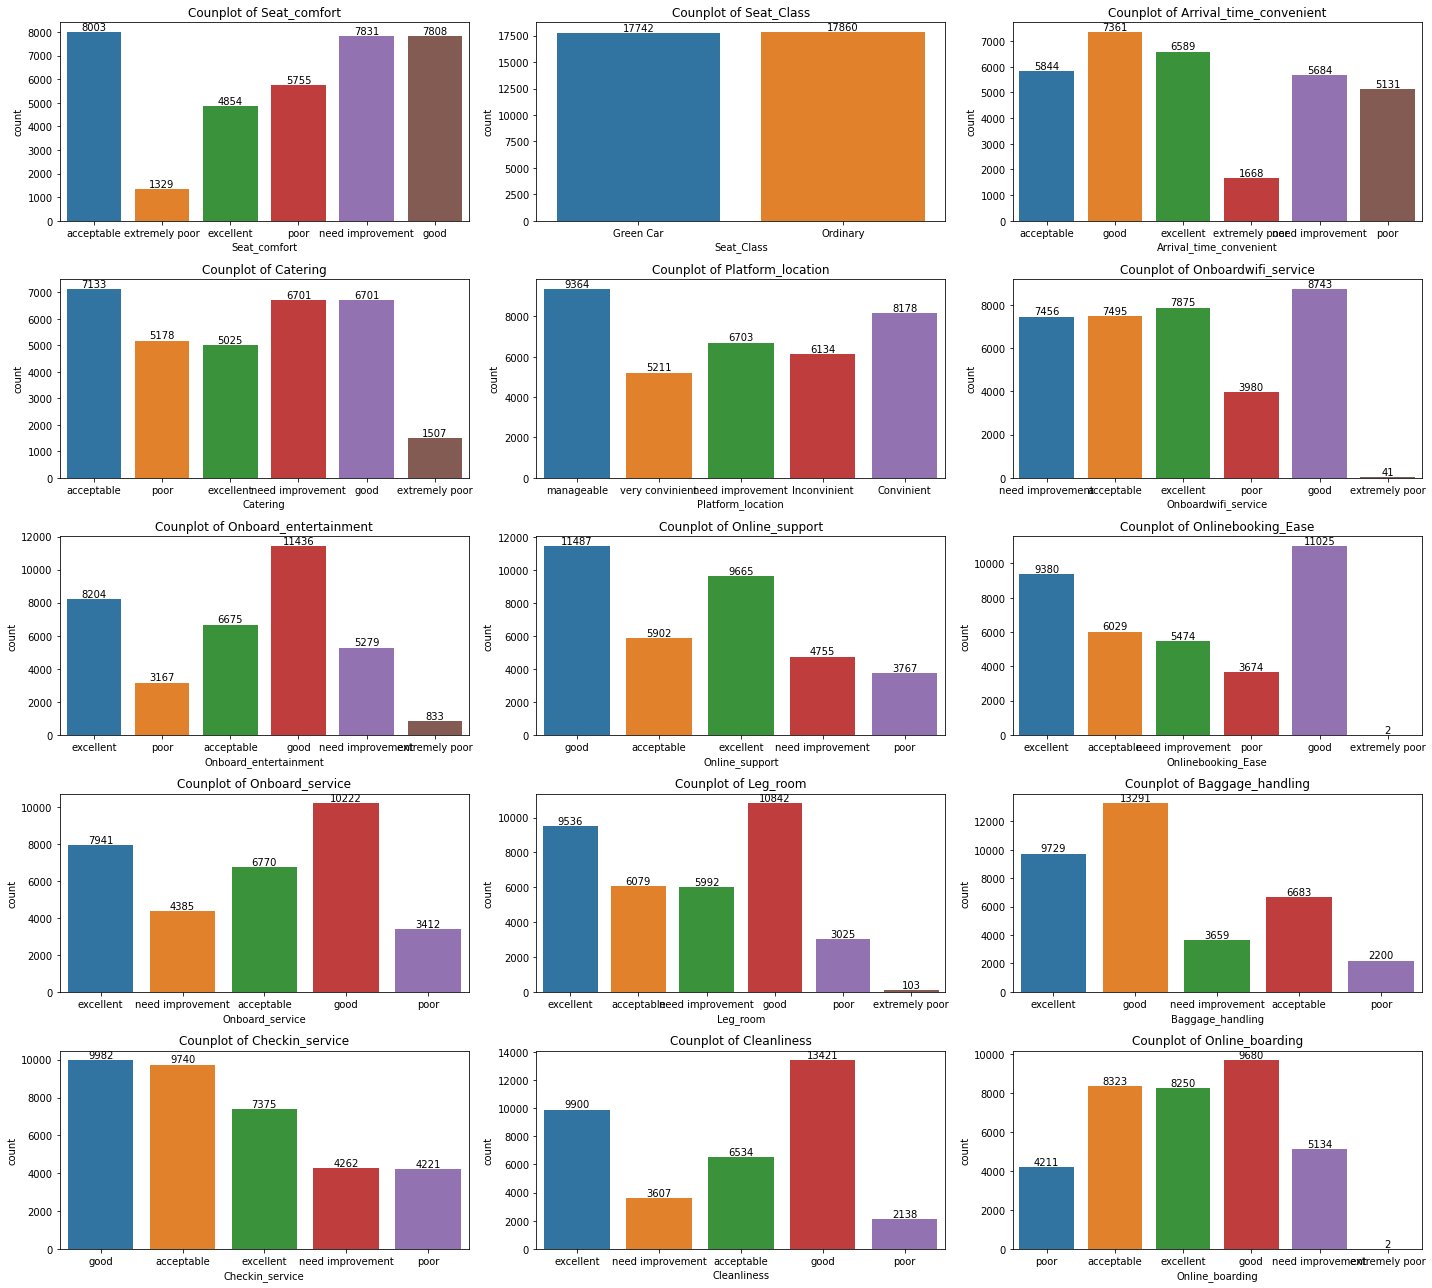

In [19]:
datacat=stest.select_dtypes(include='object')

plt.figure(figsize = (20,18))
feature_list = datacat.columns
for i in range(len(feature_list)):
    plt.subplot(5, 3, i + 1)
    ax1=sns.countplot(x = datacat[feature_list[i]], data = datacat)
    ax1.bar_label(ax1.containers[0])
    plt.title('Counplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### Travel train data

In [20]:
# Check the head of dataset
ttrain.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0


In [21]:
# Check the tail of dataset
ttrain.tail()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
94374,98894375,Male,Loyal Customer,32.0,Business travel,Business,1357,83.0,125.0
94375,98894376,Male,Loyal Customer,44.0,Business travel,Business,592,5.0,11.0
94376,98894377,Male,NaN,63.0,Business travel,Business,2794,0.0,0.0
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0
94378,98894379,Male,Loyal Customer,54.0,NaN,Eco,2107,28.0,28.0


In [22]:
# Get information about the train dataset
print(ttrain.info())

# Get basic statistics of numerical variables in the train dataset
ttrain.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      94379 non-null  int64  
 1   Gender                  94302 non-null  object 
 2   CustomerType            85428 non-null  object 
 3   Age                     94346 non-null  float64
 4   TypeTravel              85153 non-null  object 
 5   Travel_Class            94379 non-null  object 
 6   Travel_Distance         94379 non-null  int64  
 7   DepartureDelay_in_Mins  94322 non-null  float64
 8   ArrivalDelay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB
None


,ID,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
count,9.437900e+04,94346.000000,94379.000000,94322.000000,94022.000000
mean,9.884719e+07,39.419647,1978.888185,14.647092,15.005222
std,2.724501e+04,15.116632,1027.961019,38.138781,38.439409
min,9.880000e+07,7.000000,50.000000,0.000000,0.000000
25%,9.882360e+07,27.000000,1359.000000,0.000000,0.000000
50%,9.884719e+07,40.000000,1923.000000,0.000000,0.000000
75%,9.887078e+07,51.000000,2538.000000,12.000000,13.000000
max,9.889438e+07,85.000000,6951.000000,1592.000000,1584.000000


In [23]:
# Check for null values and show the percentage of nulls
print('null check')
null_values = ttrain.isnull().sum().rename('null_count')
null_percent = ((null_values / ttrain.shape[0]) * 100).rename('null_percentage')
null_info = pd.concat([null_values,null_percent],axis=1)
print(null_info)

# Check for duplicate rows
print('\n duplicate data check \n')
duplicate_rows = ttrain[ttrain.duplicated()]
duplicate_rows

# Check for zeros and show the percentage of zeros
print('\n zeros check \n')
zero_values = ttrain.eq(0).sum().rename('zero_count')
zero_percent = (zero_values / ttrain.shape[0]) * 100
zero_percent = zero_percent.rename('zero_percentage')
zero_info = pd.concat([zero_values,zero_percent],axis=1)
print(zero_info)

null check
                        null_count  null_percentage
ID                               0         0.000000
Gender                          77         0.081586
CustomerType                  8951         9.484101
Age                             33         0.034965
TypeTravel                    9226         9.775480
Travel_Class                     0         0.000000
Travel_Distance                  0         0.000000
DepartureDelay_in_Mins          57         0.060395
ArrivalDelay_in_Mins           357         0.378262

 duplicate data check 


 zeros check 

                        zero_count  zero_percentage
ID                               0         0.000000
Gender                           0         0.000000
CustomerType                     0         0.000000
Age                              0         0.000000
TypeTravel                       0         0.000000
Travel_Class                     0         0.000000
Travel_Distance                  0         0.000000
DepartureDel

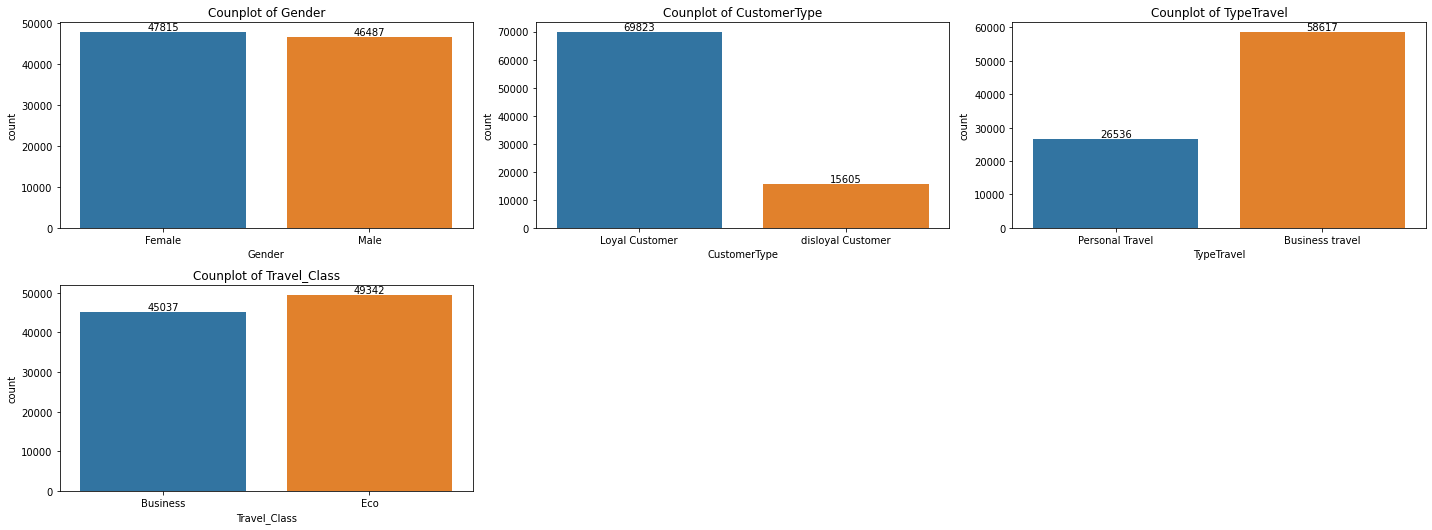

In [24]:
datacat=ttrain.select_dtypes(include='object')

plt.figure(figsize = (20,18))
feature_list = datacat.columns
for i in range(len(feature_list)):
    plt.subplot(5, 3, i + 1)
    ax1=sns.countplot(x = datacat[feature_list[i]], data = datacat)
    ax1.bar_label(ax1.containers[0])
    plt.title('Counplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### Travel test data

In [25]:
# Check the head of dataset
ttest.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,99900001,Female,NaN,36.0,Business travel,Business,532,0.0,0.0
1,99900002,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0
2,99900003,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0


In [26]:
# Check the tail of dataset
ttest.tail()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
35597,99935598,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0
35598,99935599,Female,Loyal Customer,53.0,Business travel,Business,1772,0.0,0.0
35599,99935600,Male,disloyal Customer,22.0,Business travel,Eco,1180,0.0,0.0
35600,99935601,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0
35601,99935602,Male,NaN,20.0,Personal Travel,Eco,1680,0.0,0.0


In [27]:
# Get information about the train dataset
print(ttest.info())

# Get basic statistics of numerical variables in the train dataset
ttest.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      35602 non-null  int64  
 1   Gender                  35572 non-null  object 
 2   CustomerType            32219 non-null  object 
 3   Age                     35591 non-null  float64
 4   TypeTravel              32154 non-null  object 
 5   Travel_Class            35602 non-null  object 
 6   Travel_Distance         35602 non-null  int64  
 7   DepartureDelay_in_Mins  35573 non-null  float64
 8   ArrivalDelay_in_Mins    35479 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.4+ MB
None


,ID,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
count,3.560200e+04,35591.000000,35602.000000,35573.000000,35479.000000
mean,9.991780e+07,39.446995,1987.151761,14.880696,15.308802
std,1.027756e+04,15.137554,1024.308863,37.895453,38.531293
min,9.990000e+07,7.000000,50.000000,0.000000,0.000000
25%,9.990890e+07,27.000000,1360.000000,0.000000,0.000000
50%,9.991780e+07,40.000000,1929.000000,0.000000,0.000000
75%,9.992670e+07,51.000000,2559.000000,13.000000,13.000000
max,9.993560e+07,85.000000,6868.000000,978.000000,970.000000


In [28]:
# Check for null values and show the percentage of nulls
print('null check')
null_values = ttest.isnull().sum().rename('null_count')
null_percent = ((null_values / ttest.shape[0]) * 100).rename('null_percentage')
null_info = pd.concat([null_values,null_percent],axis=1)
print(null_info)


# Check for duplicate rows
print('\n duplicate data check \n')
duplicate_rows = ttest[ttest.duplicated()]
duplicate_rows

# Check for zeros and show the percentage of zeros
print('\n zeros check \n')
zero_values = ttest.eq(0).sum().rename('zero_count')
zero_percent = (zero_values / ttest.shape[0]) * 100
zero_percent = zero_percent.rename('zero_percentage')
zero_info = pd.concat([zero_values,zero_percent],axis=1)
print(zero_info)

null check
                        null_count  null_percentage
ID                               0         0.000000
Gender                          30         0.084265
CustomerType                  3383         9.502275
Age                             11         0.030897
TypeTravel                    3448         9.684849
Travel_Class                     0         0.000000
Travel_Distance                  0         0.000000
DepartureDelay_in_Mins          29         0.081456
ArrivalDelay_in_Mins           123         0.345486

 duplicate data check 


 zeros check 

                        zero_count  zero_percentage
ID                               0         0.000000
Gender                           0         0.000000
CustomerType                     0         0.000000
Age                              0         0.000000
TypeTravel                       0         0.000000
Travel_Class                     0         0.000000
Travel_Distance                  0         0.000000
DepartureDel

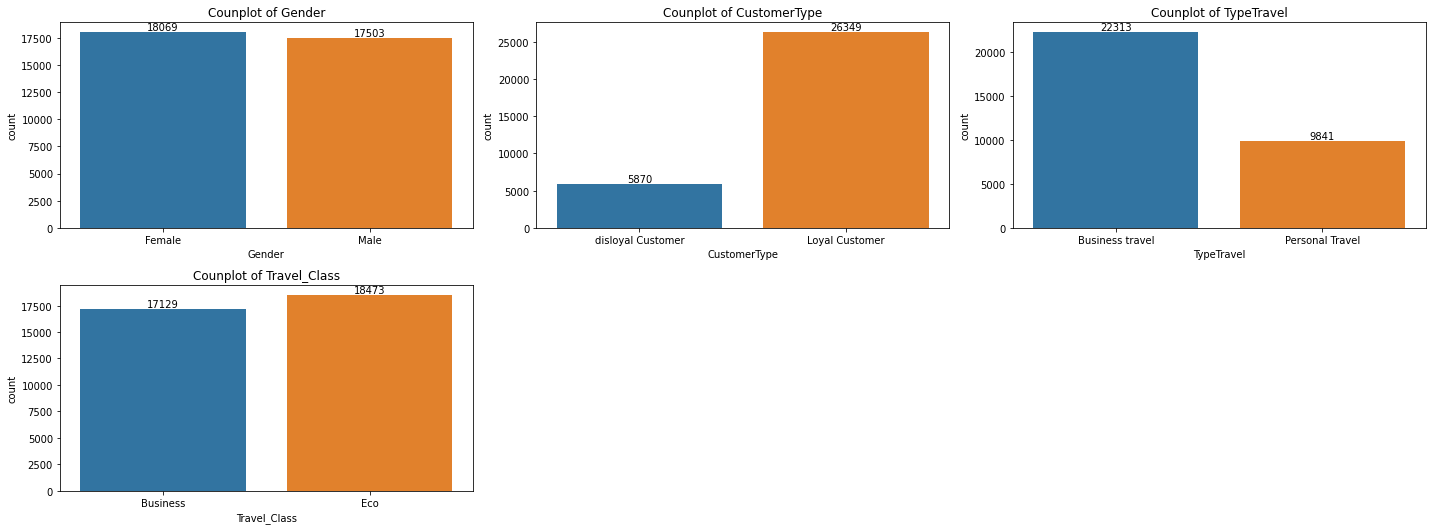

In [29]:
datacat=ttest.select_dtypes(include='object')

plt.figure(figsize = (20,18))
feature_list = datacat.columns
for i in range(len(feature_list)):
    plt.subplot(5, 3, i + 1)
    ax1=sns.countplot(x = datacat[feature_list[i]], data = datacat)
    ax1.bar_label(ax1.containers[0])
    plt.title('Counplot of {}'.format(feature_list[i]))
    plt.tight_layout()

## merge data

In [30]:
traind = pd.merge(ttrain, strain, on='ID', how='inner')
testd = pd.merge(ttest, stest, on='ID', how='inner')

### encode data

In [44]:
# Create a dictionary that maps the current values to the new values
mapping = {'good': 4, 'excellent': 5, 'acceptable':3, 'need improvement':2, 'poor':1 , 'extremely poor':0}

a='Onlinebooking_Ease'

# Use the replace() method to map the values in the column
traind[a] = traind[a].replace(mapping)
# Use the replace() method to map the values in the column
testd[a] = testd[a].replace(mapping)

a='Onboard_service'

# Use the replace() method to map the values in the column
traind[a] = traind[a].replace(mapping)
# Use the replace() method to map the values in the column
testd[a] = testd[a].replace(mapping)


a='Leg_room'

# Use the replace() method to map the values in the column
traind[a] = traind[a].replace(mapping)
# Use the replace() method to map the values in the column
testd[a] = testd[a].replace(mapping)


a='Baggage_handling'

# Use the replace() method to map the values in the column
traind[a] = traind[a].replace(mapping)
# Use the replace() method to map the values in the column
testd[a] = testd[a].replace(mapping)


a='Checkin_service'

# Use the replace() method to map the values in the column
traind[a] = traind[a].replace(mapping)
# Use the replace() method to map the values in the column
testd[a] = testd[a].replace(mapping)


a='Cleanliness'

# Use the replace() method to map the values in the column
traind[a] = traind[a].replace(mapping)
# Use the replace() method to map the values in the column
testd[a] = testd[a].replace(mapping)


a='Online_boarding'

# Use the replace() method to map the values in the column
traind[a] = traind[a].replace(mapping)
# Use the replace() method to map the values in the column
testd[a] = testd[a].replace(mapping)


a='Catering'

# Use the replace() method to map the values in the column
traind[a] = traind[a].replace(mapping)
# Use the replace() method to map the values in the column
testd[a] = testd[a].replace(mapping)

a='Onboardwifi_service'

# Use the replace() method to map the values in the column
traind[a] = traind[a].replace(mapping)
# Use the replace() method to map the values in the column
testd[a] = testd[a].replace(mapping)


a='Onboard_entertainment'

# Use the replace() method to map the values in the column
traind[a] = traind[a].replace(mapping)
# Use the replace() method to map the values in the column
testd[a] = testd[a].replace(mapping)

a='Online_support'

# Use the replace() method to map the values in the column
traind[a] = traind[a].replace(mapping)
# Use the replace() method to map the values in the column
testd[a] = testd[a].replace(mapping)

a='Arrival_time_convenient'

# Use the replace() method to map the values in the column
traind[a] = traind[a].replace(mapping)
# Use the replace() method to map the values in the column
testd[a] = testd[a].replace(mapping)

# Create a dictionary that maps the current values to the new values
mapping = {'Green Car': 1, 'Ordinary': 0}

a='Seat_Class'

# Use the replace() method to map the values in the column
traind[a] = traind[a].replace(mapping)
# Use the replace() method to map the values in the column
testd[a] = testd[a].replace(mapping)

# Create a dictionary that maps the current values to the new values
mapping = {'Business': 1, 'Eco': 0}

a='Travel_Class'

# Use the replace() method to map the values in the column
traind[a] = traind[a].replace(mapping)
# Use the replace() method to map the values in the column
testd[a] = testd[a].replace(mapping)

# Create a dictionary that maps the current values to the new values
mapping = {'Convinient': 4, 'very convinient': 5, 'manageable':3, 'need improvement':2, 'Inconvinient':1 , 'very inconvinient':0}

a='Platform_location'

# Use the replace() method to map the values in the column
traind[a] = traind[a].replace(mapping)
# Use the replace() method to map the values in the column
testd[a] = testd[a].replace(mapping)

# Create a dictionary that maps the current values to the new values
mapping = {'Business travel': 1, 'Personal Travel': 0}

a='TypeTravel'

# Use the replace() method to map the values in the column
traind[a] = traind[a].replace(mapping)
# Use the replace() method to map the values in the column
testd[a] = testd[a].replace(mapping)

# Create a dictionary that maps the current values to the new values
mapping = {'Loyal Customer': 1, 'disloyal Customer': 0}

a='CustomerType'

# Use the replace() method to map the values in the column
traind[a] = traind[a].replace(mapping)
# Use the replace() method to map the values in the column
testd[a] = testd[a].replace(mapping)

# Create a dictionary that maps the current values to the new values
mapping = {'acceptable': 2, 'need improvement': 3, 'good': 4, 'poor': 1, 'excellent': 5, 'extremely poor': 0}

# Use the replace() method to map the values in the 'Seat_comfort' column
traind['Seat_comfort'] = traind['Seat_comfort'].replace(mapping)
# Use the replace() method to map the values in the 'Seat_comfort' column
testd['Seat_comfort'] = testd['Seat_comfort'].replace(mapping)

# Create a dictionary that maps the current values to the new values
mapping = {'Female': 1, 'Male': 0}

# Use the replace() method to map the values in the  column
traind['Gender'] = traind['Gender'].replace(mapping)
# Use the replace() method to map the values in the column
testd['Gender'] = testd['Gender'].replace(mapping)

### treat missing values 

In [45]:
# Fill null values with the mean for int and float type columns
traind = traind.fillna(traind.mean())
testd = testd.fillna(testd.mean())

In [46]:
traind.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,9.882360e+07,98847190.0,98870784.5,98894379.0
Gender,94379.0,5.070412e-01,0.499749,0.0,0.000000e+00,1.0,1.0,1.0
CustomerType,94379.0,8.173316e-01,0.367617,0.0,8.173316e-01,1.0,1.0,1.0
Age,94379.0,3.941965e+01,15.113989,7.0,2.700000e+01,40.0,51.0,85.0
TypeTravel,94379.0,6.883727e-01,0.439941,0.0,0.000000e+00,1.0,1.0,1.0
Travel_Class,94379.0,4.771930e-01,0.499482,0.0,0.000000e+00,0.0,1.0,1.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1.359000e+03,1923.0,2538.0,6951.0
DepartureDelay_in_Mins,94379.0,1.464709e+01,38.127262,0.0,0.000000e+00,0.0,12.0,1592.0
ArrivalDelay_in_Mins,94379.0,1.500522e+01,38.366639,0.0,0.000000e+00,0.0,13.0,1584.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.000000e+00,1.0,1.0,1.0


In [47]:
testd.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,35602.0,9.991780e+07,10277.556478,99900001.0,9.990890e+07,99917801.5,99926701.75,99935602.0
Gender,35602.0,5.079557e-01,0.499733,0.0,0.000000e+00,1.0,1.00,1.0
CustomerType,35602.0,8.178094e-01,0.367210,0.0,8.178094e-01,1.0,1.00,1.0
Age,35602.0,3.944700e+01,15.135215,7.0,2.700000e+01,40.0,51.00,85.0
TypeTravel,35602.0,6.939417e-01,0.437976,0.0,0.000000e+00,1.0,1.00,1.0
Travel_Class,35602.0,4.811247e-01,0.499651,0.0,0.000000e+00,0.0,1.00,1.0
Travel_Distance,35602.0,1.987152e+03,1024.308863,50.0,1.360000e+03,1929.0,2559.00,6868.0
DepartureDelay_in_Mins,35602.0,1.488070e+01,37.880016,0.0,0.000000e+00,0.0,13.00,978.0
ArrivalDelay_in_Mins,35602.0,1.530880e+01,38.464673,0.0,0.000000e+00,0.0,13.00,970.0
Seat_comfort,35602.0,2.831816e+00,1.394206,0.0,2.000000e+00,3.0,4.00,5.0


In [ ]:
traind.columns

In [ ]:
testd.columns

# train test split

In [50]:
# Assign the features and target variables
X = traind.drop(['Overall_Experience'], axis=1)
y = traind['Overall_Experience']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Assign the features and target variables
X_testdata = testd


display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)
display(X_testdata.shape)

(66065, 24)

(28314, 24)

(66065,)

(28314,)

(35602, 24)

In [45]:
#Model Building
dTree = DecisionTreeClassifier(random_state =9, max_depth=15)
dTree1 = DecisionTreeClassifier(random_state =9, max_depth=15, min_samples_split= 75, min_samples_leaf = 15)
rf = RandomForestClassifier(n_estimators=220, max_depth= 20, max_features= 15, random_state = 100)
rf1 = RandomForestClassifier(n_estimators=100, random_state = 100)
bgg = BaggingClassifier(random_state=5)
bgg1 = BaggingClassifier(base_estimator=dTree, n_estimators=50, random_state=500, max_features= 10)
grad = GradientBoostingClassifier(random_state= 3000, learning_rate=0.1, n_estimators=100)
ada1 = AdaBoostClassifier(base_estimator=rf, n_estimators=22, learning_rate=0.1, random_state= 88)
ada2 = AdaBoostClassifier(base_estimator=dTree, n_estimators=20, learning_rate=0.1, random_state= 88)
gb = GaussianNB()
lr = LogisticRegression(random_state= 100, penalty='l2', tol=0.0001)
lr1 = LogisticRegression(random_state= 70, penalty='l1', solver = 'saga', tol=0.0001)

In [46]:
model = [dTree, dTree1, rf, rf1, bgg, bgg1, grad, ada1, ada2, gb, lr, lr1]

for i in model: #accuracy on train set from training data
    i.fit(X_train , y_train)
    y_predict = i.predict(X_train)
    display(accuracy_score(y_train, y_predict))

0.9715583137818815

0.9425111632483161

0.997275410580489

1.0

0.9964580337546356

0.9813819723000076

0.9218799666994627

0.9983955195640657

1.0

0.7889351396352078

0.54320744721108

0.54320744721108

In [47]:
for i in model:  #accuracy on test set from training data
    i.fit(X_train , y_train)
    y_predict_test = i.predict(X_test)
    display(accuracy_score(y_test, y_predict_test))

0.9341315250406159

0.9300699300699301

0.9524263615172706

0.9498481316663134

0.9454686727414

0.9334957971321608

0.9212403757858303

0.9534152715970898

0.9429257611075793

0.7895387440841987

0.554707918344282

0.554707918344282

In [48]:
##----- Trial and Error Block for Random Forest --------
rf = RandomForestClassifier(n_estimators=230, max_depth= 20, max_features= 15, random_state = 100)
rf.fit(X_train , y_train)
y_predict = rf.predict(X_train)
display(accuracy_score(y_train, y_predict))

y_predict_test = rf.predict(X_test)
display(accuracy_score(y_test, y_predict_test))

0.9972905471883751

0.9526735890372254

In [ ]:
#Trial block for ---SVM (gamma, c)------
clt = SVC(gamma = 0.25, C = 2)
clt.fit(X_train , y_train)
y_predict = clt.predict(X_train)
display(accuracy_score(y_train, y_predict))

y_predict_test = clt.predict(X_test)
display(accuracy_score(y_test, y_predict_test))

In [ ]:
#Param tuning on Random Forest with cv = 5
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [17, 20, 25],
    'max_features' : [15, 17, 20] }


rf = RandomForestClassifier(random_state = 100)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5)


grid_search.fit(X_train,y_train)
y_predict = grid_search.predict(X_train)
display(accuracy_score(y_train, y_predict))

y_predict_test = grid_search.predict(X_test)
display(accuracy_score(y_test, y_predict_test))

In [ ]:
#Votting with the best models
voting = VotingClassifier(estimators = [('RF', rf), ('AdaBoost', ada1)] , voting = 'hard')
voting.fit(X_train, y_train)

display(accuracy_score(y_train, voting.predict(X_train)))
display(accuracy_score(y_test, voting.predict(X_test)))

In [ ]:
#-------- 1st BEST model File ---------
df_test1 = testd.copy()
pred = ada1.predict(df_test)
df_test1['Overall_Experience'] = pred
sample = df_test1[['ID', 'Overall_Experience']]

sample.to_csv('hacktt.csv', index=False)
solver=pd.read_csv('hacktt.csv')
solver

In [ ]:
#--------2nd BEST model File ---------
df_test1 = testd.copy()
pred = rf.predict(df_test1)
df_test1['Overall_Experience'] = pred
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('hack.csv', index=False)
solver=pd.read_csv('hack.csv')
solver

In [ ]:
#--------3nd BEST model File ---------
df_test1 = testd.copy()
pred = dTree.predict(df_test1)
df_test1['Overall_Experience'] = pred
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('solve2.csv', index=False)